In [1]:
import pandas as pd

## Daten einlesen und Grundstatistik

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv.gz")

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.describe(include="all")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


## Duplikate entfernen

In [5]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [6]:
df[df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
len(df)

96146

## Unvollständige Daten?

In [9]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Visualisierung

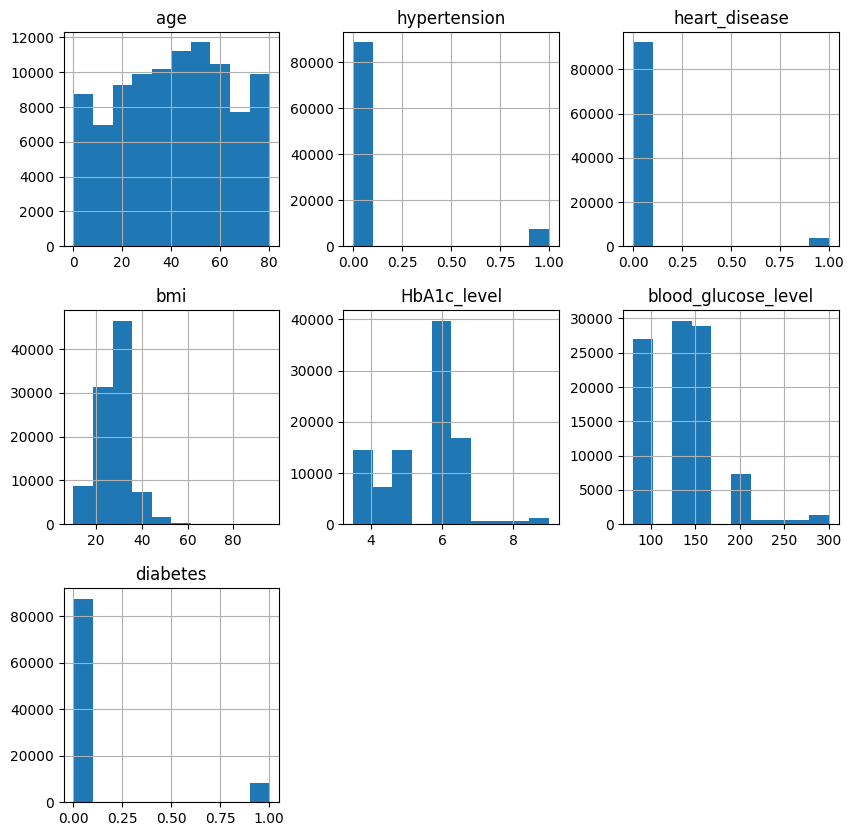

In [10]:
df.hist(figsize=(10, 10));

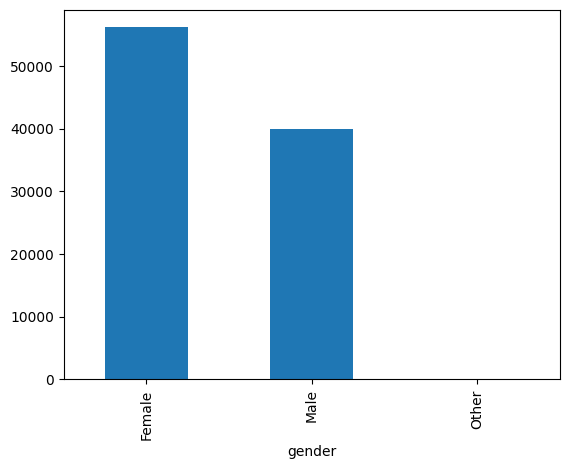

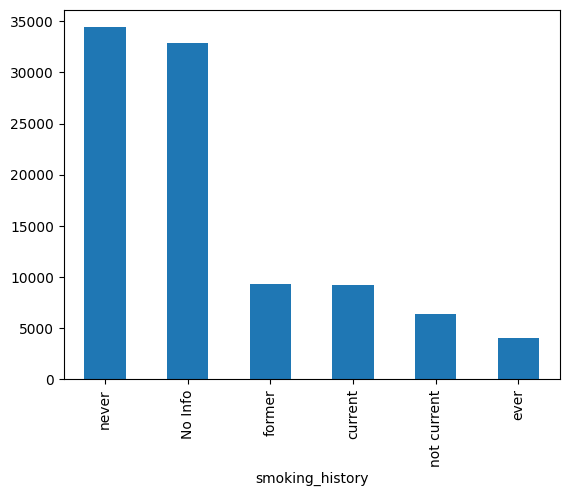

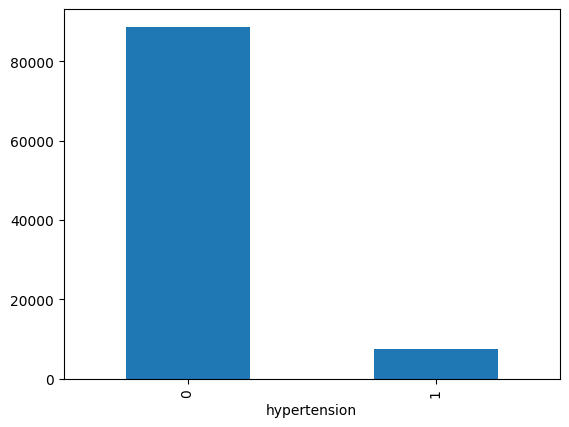

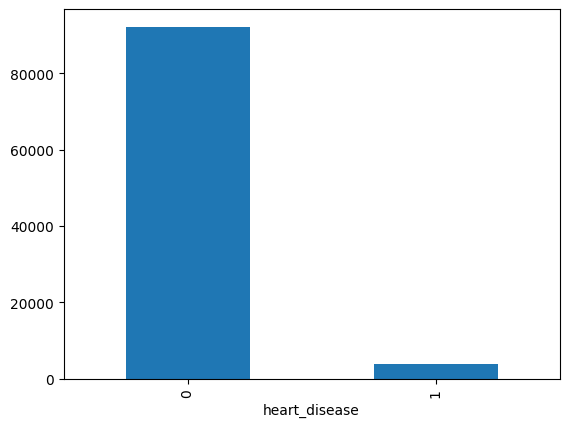

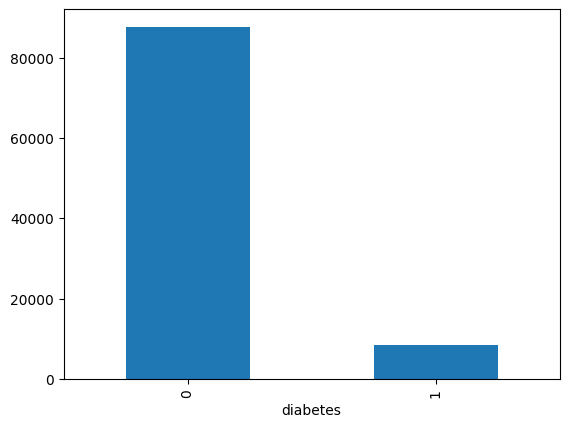

In [11]:
import matplotlib.pyplot as plt
nominal_columns = [column for column in df.columns if df[column].dtype == 'object']
nominal_columns += ["hypertension", "heart_disease", "diabetes"]
for c in nominal_columns:
    df[c].value_counts().plot.bar()
    plt.show()

## Differenzierung durch $HbA_{1c}$?

<Axes: ylabel='Frequency'>

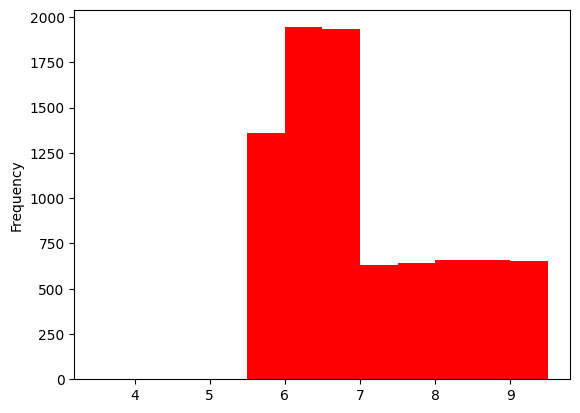

In [12]:
df[df["diabetes"]==1]["HbA1c_level"].plot.hist(bins=12, range=(3.5,9.5), color="r")

<Axes: ylabel='Frequency'>

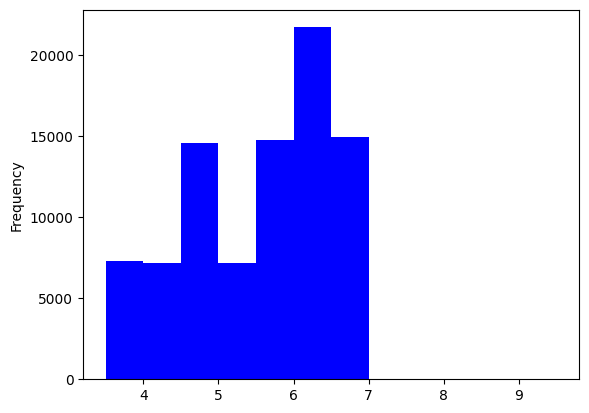

In [13]:
df[df["diabetes"]==0]["HbA1c_level"].plot.hist(bins=12, range=(3.5,9.5), color="b")

<Axes: ylabel='Frequency'>

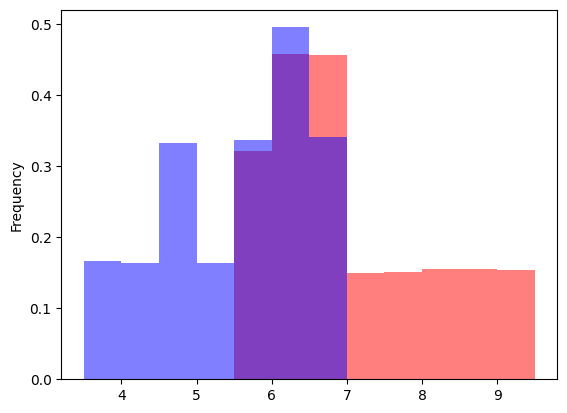

In [14]:
pos = df[df["diabetes"]==1]["HbA1c_level"]
pos.plot.hist(bins=12, range=(3.5,9.5), color="r", alpha=0.5, density=True)
neg = df[df["diabetes"]==0]["HbA1c_level"]
neg.plot.hist(bins=12, range=(3.5,9.5), color="b", alpha=0.5, density=True)

# Vorhersagen

In [15]:
from sklearn.preprocessing import  LabelEncoder
diabetes = df.copy()
for c in nominal_columns:
    enc = LabelEncoder()
    diabetes[c] = enc.fit_transform(diabetes[c])

`X` ist die unabhängige Variable, `y` die abhängige

In [16]:
X = diabetes.drop(columns=['diabetes'])
y = diabetes["diabetes"]

In [17]:
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [18]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score

res = []
for m in [
          MultinomialNB(),
          LogisticRegression(max_iter=5000), 
          SVC(kernel='linear', random_state=42),
          SGDClassifier(loss="hinge", random_state=42),
          MLPClassifier(random_state=42),
          KNeighborsClassifier(n_neighbors=5),
          AdaBoostClassifier(n_estimators=50, random_state=42),
          GradientBoostingClassifier(random_state=42),
          RandomForestClassifier(random_state=42, n_jobs=-1),
         ]:
    m.fit(X_train, y_train)
    y_test_predict = m.predict(X_test)
    #print(m)
    #print(classification_report(y_test_predict, y_predict))
    y_train_predict = m.predict(X_train)
    res.append((str(m), 
            precision_score(y_test, y_test_predict, average="macro"),
            recall_score(y_test, y_test_predict, average="macro"), 
            accuracy_score(y_test, y_test_predict),
            precision_score(y_train, y_train_predict, average="macro"),
            recall_score(y_train, y_train_predict, average="macro"), 
            accuracy_score(y_train, y_train_predict)))

In [24]:
res_df = pd.DataFrame(res, columns=["classificator", "precision test", "recall test", "accuracy test",
                                    "precision train", "recall train", "accuracy train"]).set_index("classificator")

In [25]:
res_df

,precision test,recall test,accuracy test,precision train,recall train,accuracy train
classificator,,,,,,
MultinomialNB(),0.651047,0.619049,0.891958,0.647398,0.615702,0.893938
LogisticRegression(max_iter=5000),0.912804,0.810153,0.957524,0.917483,0.810198,0.959284
"SVC(kernel='linear', random_state=42)",0.927694,0.798233,0.957773,0.930997,0.797317,0.959159
SGDClassifier(random_state=42),0.877093,0.825787,0.953821,0.879575,0.827691,0.955678
MLPClassifier(random_state=42),0.971306,0.768439,0.957649,0.971628,0.770951,0.959242
KNeighborsClassifier(),0.912607,0.766835,0.951325,0.949426,0.798499,0.961447
AdaBoostClassifier(random_state=42),0.973141,0.845255,0.970712,0.971554,0.843001,0.970947
GradientBoostingClassifier(random_state=42),0.977592,0.842367,0.970753,0.979469,0.840871,0.971501
"RandomForestClassifier(n_jobs=-1, random_state=42)",0.960137,0.842471,0.968673,0.999090,0.997089,0.999390


In [27]:
res_df.style.background_gradient(cmap='coolwarm')

,precision test,recall test,accuracy test,precision train,recall train,accuracy train
classificator,,,,,,
MultinomialNB(),0.651047,0.619049,0.891958,0.647398,0.615702,0.893938
LogisticRegression(max_iter=5000),0.912804,0.810153,0.957524,0.917483,0.810198,0.959284
"SVC(kernel='linear', random_state=42)",0.927694,0.798233,0.957773,0.930997,0.797317,0.959159
SGDClassifier(random_state=42),0.877093,0.825787,0.953821,0.879575,0.827691,0.955678
MLPClassifier(random_state=42),0.971306,0.768439,0.957649,0.971628,0.770951,0.959242
KNeighborsClassifier(),0.912607,0.766835,0.951325,0.949426,0.798499,0.961447
AdaBoostClassifier(random_state=42),0.973141,0.845255,0.970712,0.971554,0.843001,0.970947
GradientBoostingClassifier(random_state=42),0.977592,0.842367,0.970753,0.979469,0.840871,0.971501
"RandomForestClassifier(n_jobs=-1, random_state=42)",0.960137,0.842471,0.968673,0.999090,0.997089,0.999390
